Pemodelan Pemenang Penghargaan All-NBA Menggunakan Metode *Machine Learning*
---
**Tugas Akhir Mata Kuliah *Reseach and Methodology***

**Dibuat Oleh:**
- Dennis Jonathan (23101910027)

*S1 Business Mathematics 2019 - Universitas Prasetiya Mulya*

## 1. Pendahuluan

### 1.1. Mengimpor *Library* yang Dibutuhkan

In [1]:
# Mengimpor library data processing dan analisis numerik
import pandas as pd
import numpy as np
from data_processing import *

# Mengimpor library untuk membuat grafik
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Mengimpor fungsi preprocessing dan oversampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Megimpor library pemodelan Regresi Logistik
import statsmodels.api as sm
from logreg_functions import *

# Mengimpor fungsi pemodelan Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Mengimpor library pemodelan Neural Network
import tensorflow as tf
import tensorflow_addons as tfa
from nn_functions import *

# Mengimpor fungsi untuk mengevaluasi model
from model_evaluation import *

# Mengimpor fungsi untuk tes hipotesa
from scipy.stats import binom_test

# Memedamkan peringatan dari Python
import warnings
warnings.filterwarnings('ignore')

# Setting matplotlib
%matplotlib inline

### 1.2. Mengimpor Data *Advanced Statistics* untuk *Training* dan *Development*

In [2]:
# Membaca data advanced statistics masuk ke notebook
raw_data = pd.read_csv('traindev.csv')

# Memperlihatkan 5 data pertama
raw_data.head()

,player,pos,age,tm,g,tmp,per,ts%,3par,ftr,...,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,year
0,Kareem Abdul-Jabbar,C,41,LAL,74,1695,12.9,0.511,0.005,0.250,...,20.1,0.9,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,1989
1,Mark Acres,C,26,BOS,62,632,8.2,0.507,0.009,0.421,...,10.4,0.4,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,1989
2,Michael Adams,PG,26,DEN,77,2787,17.5,0.567,0.431,0.363,...,19.7,5.4,2.9,8.3,0.143,2.7,0.2,2.9,3.4,1989
3,Mark Aguirre,SF,29,TOT,80,2597,16.4,0.524,0.137,0.309,...,27.4,2.4,2.1,4.5,0.082,1.4,-1.3,0.1,1.4,1989
4,Danny Ainge,PG,29,TOT,73,2377,18.0,0.554,0.290,0.228,...,22.6,5.2,1.4,6.7,0.135,2.9,-0.4,2.5,2.7,1989


### 1.3. Memunculkan Informasi Mengenai Dataset

In [3]:
# Memunculkan informasi mengenai tipe data kolom dan jumlah data hilang dari data mentah yang dimiliki
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  14838 non-null  object 
 1   pos     14838 non-null  object 
 2   age     14838 non-null  int64  
 3   tm      14838 non-null  object 
 4   g       14838 non-null  int64  
 5   tmp     14838 non-null  int64  
 6   per     14835 non-null  float64
 7   ts%     14791 non-null  float64
 8   3par    14786 non-null  float64
 9   ftr     14786 non-null  float64
 10  orb%    14835 non-null  float64
 11  drb%    14835 non-null  float64
 12  trb%    14835 non-null  float64
 13  ast%    14835 non-null  float64
 14  stl%    14835 non-null  float64
 15  blk%    14835 non-null  float64
 16  tov%    14800 non-null  float64
 17  usg%    14835 non-null  float64
 18  ows     14838 non-null  float64
 19  dws     14838 non-null  float64
 20  ws      14838 non-null  float64
 21  ws/48   14835 non-null  float64
 22

In [4]:
# Melihat dimensi dari data
print(f'Dataset ini memiliki {raw_data.shape[0]} baris dan {raw_data.shape[1]} kolom')

Dataset ini memiliki 14838 baris dan 27 kolom


In [5]:
# Memunculkan persentase data hilang di setiap kolom
raw_data.isna().sum() / len(raw_data) * 100

player    0.000000
pos       0.000000
age       0.000000
tm        0.000000
g         0.000000
tmp       0.000000
per       0.020218
ts%       0.316754
3par      0.350452
ftr       0.350452
orb%      0.020218
drb%      0.020218
trb%      0.020218
ast%      0.020218
stl%      0.020218
blk%      0.020218
tov%      0.256099
usg%      0.020218
ows       0.000000
dws       0.000000
ws        0.000000
ws/48     0.020218
obpm      0.000000
dbpm      0.000000
bpm       0.000000
vorp      0.000000
year      0.000000
dtype: float64

### 1.4. Memproses Data

In [6]:
# Menggunakan fungsi process_data untuk memproses data mentah
df = process_data(raw_data, dummies = True, all_nba_dat = 'AllNBA.csv')

# Menunjukan 5 data pertama dari data yang sudah diproses
df.head()

,player,g,tmp,per,ts%,3par,ftr,orb%,drb%,trb%,...,dws,ws,ws/48,obpm,dbpm,bpm,vorp,isAllNBA,pos_F,pos_G
0,Kareem Abdul-Jabbar,74,1695,12.9,0.511,0.005,0.250,7.3,14.2,11.0,...,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,0,0,0
1,Mark Acres,62,632,8.2,0.507,0.009,0.421,10.9,15.6,13.3,...,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,0,0,0
2,Michael Adams,77,2787,17.5,0.567,0.431,0.363,2.5,8.3,5.2,...,2.9,8.3,0.143,2.7,0.2,2.9,3.4,0,0,1
3,Mark Aguirre,80,2597,16.4,0.524,0.137,0.309,6.4,10.0,8.3,...,2.1,4.5,0.082,1.4,-1.3,0.1,1.4,0,1,0
4,Danny Ainge,73,2377,18.0,0.554,0.290,0.228,3.3,8.7,6.0,...,1.4,6.7,0.135,2.9,-0.4,2.5,2.7,0,0,1


In [7]:
# Melihat dimensi dari data setelah diproses
print(f'Dataset ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset ini memiliki 13593 baris dan 26 kolom


## 2. Analisis Dasar dan Eksplorasi Data

### 2.1. Statistika Deskriptif

In [8]:
# Memunculkan statistika deskriptif
df.describe().drop(['isAllNBA', 'pos_F', 'pos_G'], axis = 1).round(3)

,g,tmp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,...,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp
count,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,...,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000
mean,57.317,1356.647,13.276,0.520,0.210,0.304,5.871,14.311,10.089,13.292,...,14.083,18.827,1.496,1.386,2.882,0.082,-1.162,-0.106,-1.269,0.692
std,21.387,874.893,4.606,0.064,0.203,0.160,3.995,5.803,4.507,9.183,...,4.624,4.950,2.140,1.219,3.043,0.064,2.788,1.244,3.225,1.423
min,10.000,20.000,-9.100,0.111,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,2.400,-3.300,-1.000,-2.100,-0.352,-17.200,-6.600,-23.200,-2.600
25%,42.000,577.000,10.400,0.486,0.013,0.195,2.500,9.700,6.300,6.700,...,11.000,15.400,0.000,0.400,0.500,0.045,-2.900,-0.900,-3.100,-0.100
50%,63.000,1294.000,13.100,0.525,0.169,0.278,4.800,13.400,9.200,10.400,...,13.500,18.500,0.800,1.100,2.000,0.084,-1.100,-0.200,-1.200,0.200
75%,76.000,2052.000,15.900,0.558,0.364,0.379,8.800,18.300,13.400,17.800,...,16.500,22.000,2.400,2.000,4.300,0.121,0.500,0.700,0.600,1.100
max,85.000,3533.000,32.400,0.868,1.000,2.667,33.000,40.000,30.300,57.500,...,57.100,43.800,14.900,9.100,20.400,0.345,10.300,8.200,13.200,11.800


### 2.2. Distribusi Fitur

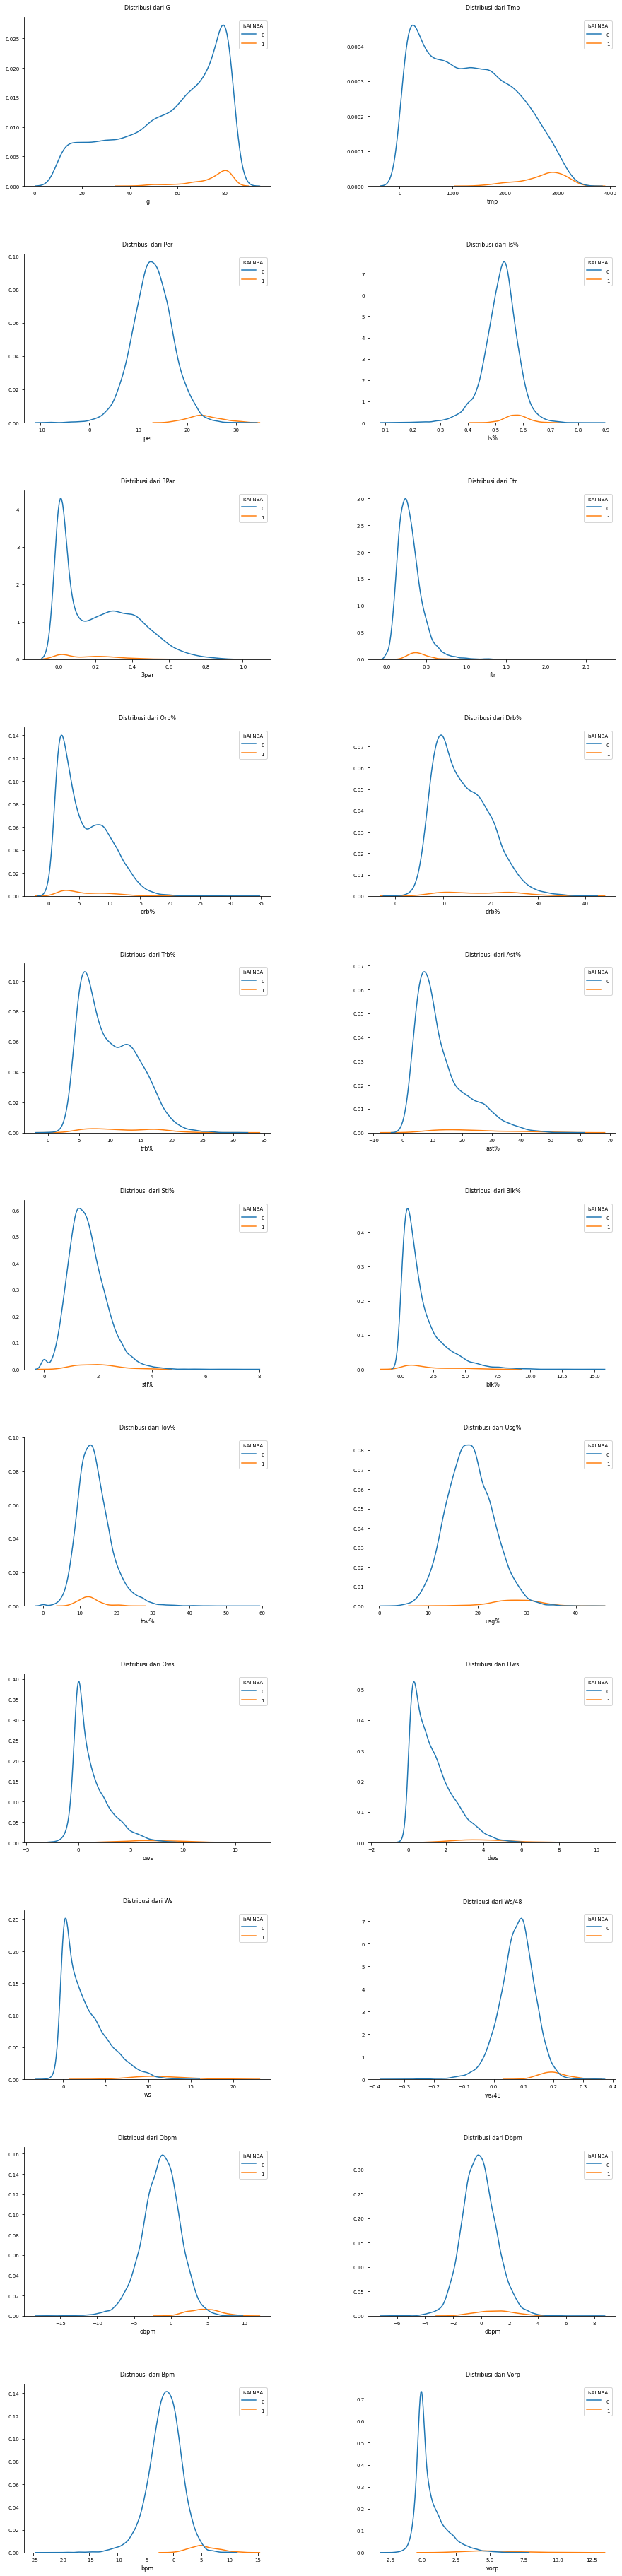

In [9]:
# Membuat subplot
plt.subplots(11, 2, figsize = (15, 66))

# Melakukan loop untuk kolom numerik yang bukan 'isAllNBA', 'pos_F', dan 'pos_G'
for n, col in enumerate(df.select_dtypes(include = np.number).columns.drop(['isAllNBA', 'pos_F', 'pos_G'])):
    # Mengatur posisi grafik
    plt.subplot(11, 2, n+1)

    # Membuat Kernel Density Estimate plot
    dis_plot = sns.kdeplot(df[col], hue = df['isAllNBA'])

    # Pengaturan plot
    plt.setp(dis_plot.get_legend().get_texts(), fontsize = '7')
    plt.setp(dis_plot.get_legend().get_title(), fontsize = '7')
    plt.setp(dis_plot.get_xticklabels(), fontsize = '7')
    plt.setp(dis_plot.get_yticklabels(), fontsize = '7')
    plt.ylabel(None)
    plt.xlabel(col, fontsize = 8)
    plt.title(f'Distribusi dari {str.title(col)}',fontsize = 8, y = 1.02)
    sns.despine()

# Mengatur jarak antar subplot
plt.subplots_adjust(wspace = 0.4,hspace = 0.4)

### 2.3. Korelasi Pearson antar Fitur

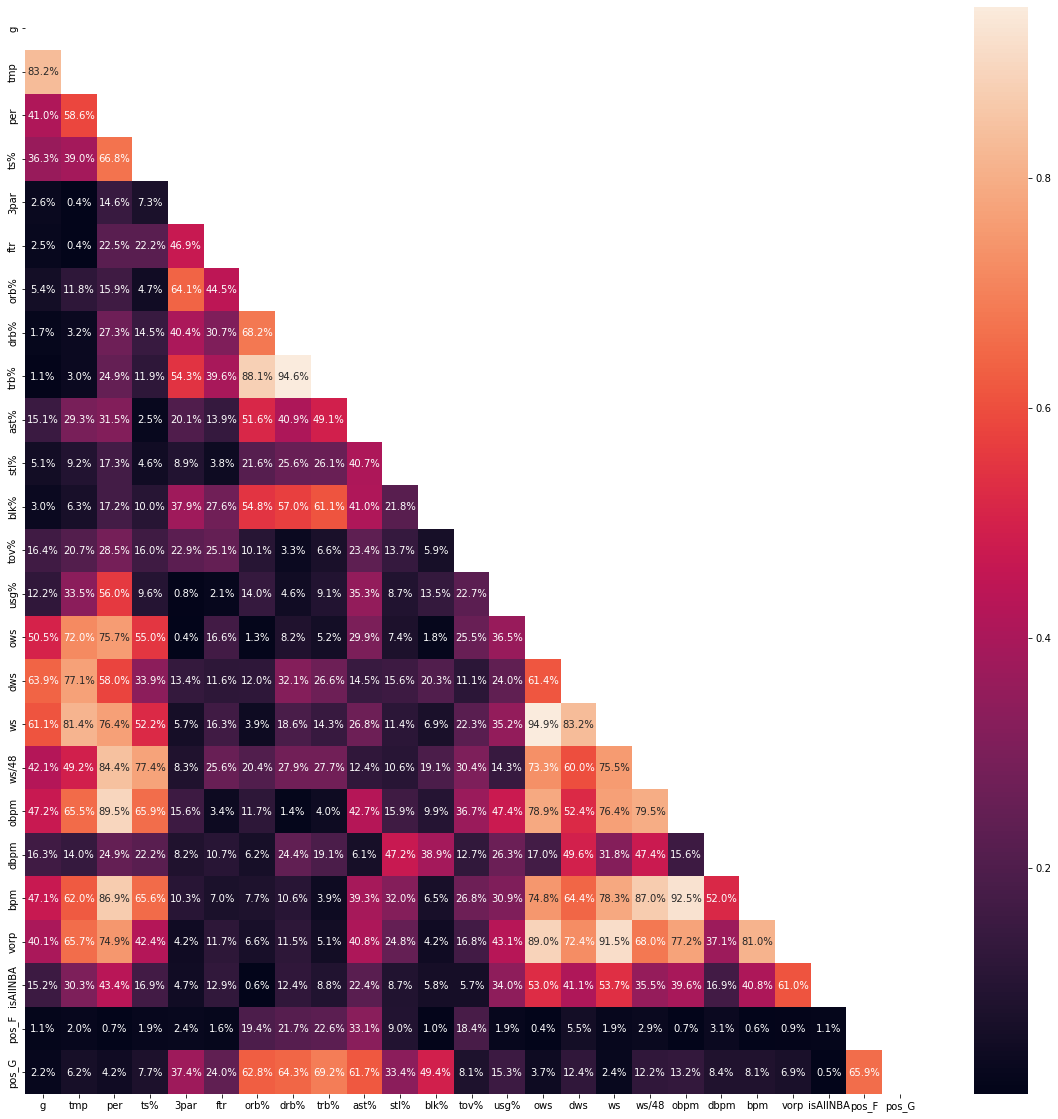

In [10]:
# Membuat figur untuk gambar
plt.figure(figsize = (20, 20))

# Membuat sebuah mask untuk index [i,i]
mask = np.triu(np.ones_like(df.corr().abs(), dtype = np.bool))

# Membuat heatmap dari data
sns.heatmap(df.corr().abs(), annot = True, fmt = '.1%', mask = mask)

# Memunculkan grafik
plt.show()

In [11]:
# Mencari korelasi fitur terhadap target
df.corr()['isAllNBA'].abs().drop(['isAllNBA']).to_frame().sort_values(by = 'isAllNBA', ascending = False).round(3) * 100

,isAllNBA
vorp,61.0
ws,53.7
ows,53.0
per,43.4
dws,41.1
bpm,40.8
obpm,39.6
ws/48,35.5
usg%,34.0
tmp,30.3


### 2.4. *Scalling* Data

In [12]:
# Melakukan scaling data
df = scaler(df, exclude = ['isAllNBA', 'pos_G','pos_F'])

# Menunjukan perubahan
df.head()

,player,g,tmp,per,ts%,3par,ftr,orb%,drb%,trb%,...,dws,ws,ws/48,obpm,dbpm,bpm,vorp,isAllNBA,pos_F,pos_G
0,Kareem Abdul-Jabbar,0.780064,0.386751,-0.081598,-0.136420,-1.009861,-0.336063,0.357779,-0.019182,0.202037,...,0.503938,0.005805,0.006752,-0.264577,-0.075464,-0.257748,-0.486306,0,0,0
1,Mark Acres,0.218955,-0.828299,-1.102060,-0.199339,-0.990121,0.734229,1.258985,0.222072,0.712341,...,-0.726798,-0.651454,-0.242044,-0.659193,-0.236195,-0.660853,-0.626895,0,0,0
2,Michael Adams,0.920341,1.634949,0.917152,0.744442,1.092458,0.371206,-0.843830,-1.035899,-1.084819,...,1.242380,1.780404,0.955285,1.385638,0.245998,1.292656,1.903709,0,0,1
3,Mark Aguirre,1.060618,1.417771,0.678321,0.068066,-0.358438,0.033219,0.132477,-0.742947,-0.397017,...,0.585987,0.531612,0.006752,0.919273,-0.959485,0.424430,0.497818,0,1,0
4,Danny Ainge,0.733305,1.166303,1.025712,0.539956,0.396620,-0.473761,-0.643562,-0.966969,-0.907322,...,0.011644,1.254597,0.830887,1.457386,-0.236195,1.168624,1.411647,0,0,1


## 3. Pemodelan

### 3.1. Preparasi Data dan Memisahkan Data *Train* dan *Development*

In [13]:
# Menentukan kolom target dan fitur
target = ['isAllNBA']
feature = df.select_dtypes(np.number).columns.drop([target[0]])

# Membagi dataset menjadi training dan dev set
X_train, X_dev, y_train, y_dev = train_test_split(df[feature],
                                                  df[target],
                                                  test_size = 0.25,
                                                  random_state = 0)

In [14]:
# Melakukan oversampling
oversample = SMOTE(random_state = 0)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

### 3.2. Pemodelan dengan Regresi Logistik

#### 3.2.1. Pengecekan Multikolinearitas Fitur

In [15]:
# Menggunakan calc_vif untuk mencari multikolinearitas di data
calc_vif(df.select_dtypes(include = np.number).drop([target[0]], axis = 1)).sort_values(by = 'VIF', ascending = False).reset_index(drop = True)

,Var,VIF
0,bpm,4176.600861
1,ws,3763.677197
2,obpm,3134.241712
3,ows,1860.321141
4,trb%,1480.262969
5,dbpm,623.497820
6,drb%,612.981119
7,dws,604.590488
8,orb%,295.184686
9,per,80.295636


In [16]:
# Menggunakan fungsi clean_vif untuk mencari kolom-kolom yang memiliki VIF <= 5
col_clean_vif = clean_vif(df.select_dtypes(include = np.number).drop([target[0]], axis = 1), 5)

# Memperlihatkan hasilnya
col_clean_vif

0         g
1       ts%
2      3par
3       ftr
4      orb%
5      drb%
6      ast%
7      stl%
8      blk%
9      tov%
10     usg%
11      ows
12      dws
13     dbpm
14    pos_F
15    pos_G
Name: Var, dtype: object

#### 3.2.2. Pemodelan dengan Fitur yang Signifikan

In [17]:
# Menggunakan fungsi p_eliminate untuk mencari kolom yang signifikan
selected_col = p_eliminate(X_train_smote[col_clean_vif], y_train_smote)

,Var,p_val
0,g,6.260038e-60
1,ts%,2.063883e-04
2,3par,1.370261e-05
3,ftr,3.561535e-02
4,orb%,5.961368e-07
5,ast%,2.404577e-11
6,stl%,1.159461e-04
7,tov%,2.578813e-04
8,usg%,1.067673e-126
9,ows,1.110824e-188


In [18]:
# Menambahkan konstan ke dataset
X_train_smote_logreg = sm.add_constant(X_train_smote)
X_train_logreg = sm.add_constant(X_train)
X_dev_logreg = sm.add_constant(X_dev)

# Memilih kolom-kolom yang memiliki p-value lebih kecil atau sama dengan 0.05
X_train_smote_logreg_sel = X_train_smote_logreg[selected_col + ['const']]
X_train_logreg_sel = X_train_logreg[selected_col + ['const']]
X_dev_logreg_sel = X_dev_logreg[selected_col + ['const']]

# Pemodelan menggunakan Regresi Logistik
logreg = sm.Logit(y_train_smote[target[0]], X_train_smote_logreg_sel).fit(disp = False)

# Memunculkan ringkasan model
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               isAllNBA   No. Observations:                19654
Model:                          Logit   Df Residuals:                    19639
Method:                           MLE   Df Model:                           14
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.8806
Time:                        15:37:47   Log-Likelihood:                -1626.1
converged:                       True   LL-Null:                       -13623.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
g             -2.2105      0.135    -16.328      0.000      -2.476      -1.945
ts%           -0.3847      0.104     -3.711      0.000      -0.588      -0.182
3par          -0.4336      0.100     -4.349      0.000      -0.629      -0.238
ftr            0.1674      0.080      2.101      0.036       0.011       0.324
orb%          -0.5499      0.110     -4.992      0.000      -0.766      -0.334
ast%           0.5115      0.077      6.679      0.000       0.361       0.662
stl%          -0.2986      0.077     -3.855      0.000      -0.450      -0.147
tov%           0.4171      0.114      3.654      0.000       0.193       0.641
usg%           1.8346      0.077     23.944      0.000       1.684       1.985
ows            2.6547      0.091     29.298      0.000       2.477       2.832
dws            2.7625      0.116     23.721      0.000       2.534       2.991
dbpm          -0.6431      0.116     -5.523      0.000      -0.871      -0.415
pos_F         -1.4862      0.160     -9.291      0.000      -1.800      -1.173
pos_G         -1.3394      0.225     -5.951      0.000      -1.781      -0.898
const         -6.5645      0.239    -27.520      0.000      -7.032      -6.097
==============================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### 3.2.3. Evaluasi Data *Training*

In [19]:
# Mencari threshold probabilitas terbaik untuk Regresi Logistik
logreg_threshold = optimal_threshold(y_dev[target[0]], logreg.predict(X_dev_logreg_sel), n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.98 dengan skor f1 80.0%


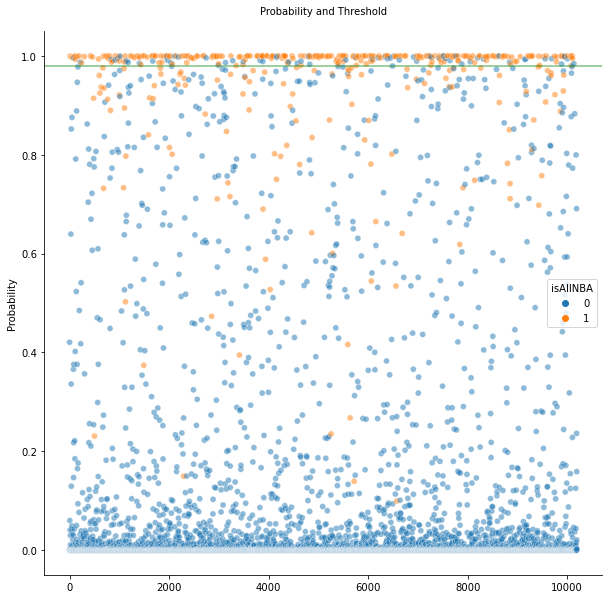

In [20]:
# Plotting hasil proabilitas data training
prob_threshold_plot(logreg.predict(X_train_logreg_sel), hue_tar = y_train['isAllNBA'], threshold = logreg_threshold)

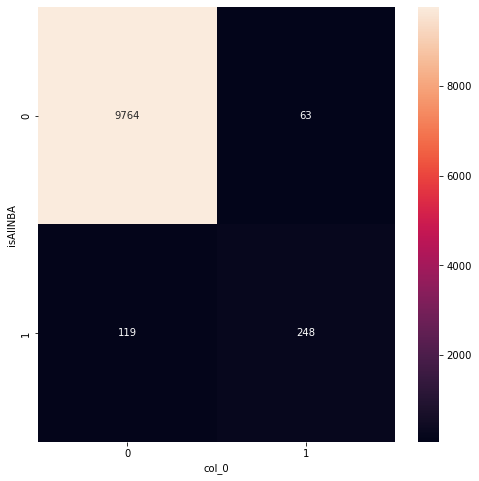

In [21]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
logreg_train_result = np.where(logreg.predict(X_train_logreg_sel) > logreg_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], logreg_train_result)

In [22]:
# Mengkalkulasi metrik dari probabilitas training
logreg_train_metrics = eval_metrics(y_train[target[0]], logreg_train_result)

# Menunjukan metrik-metrik evaluasi
logreg_train_metrics

{'tp': 248,
 'tn': 9764,
 'fn': 119,
 'fp': 63,
 'accuracy': 0.9821463606042771,
 'recall': 0.6757493188010899,
 'precision': 0.797427652733119,
 'f1': 0.7315634218289085}

#### 3.2.4. Evaluasi Data *Development*

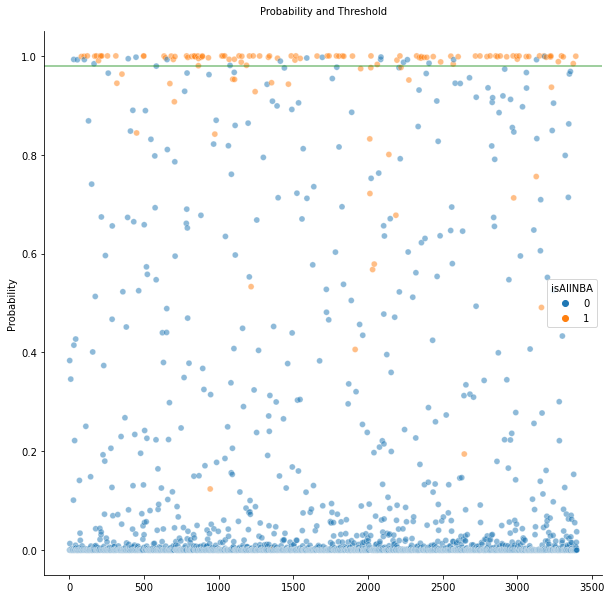

In [23]:
# Plotting hasil proabilitas data development
prob_threshold_plot(logreg.predict(X_dev_logreg_sel), hue_tar = y_dev['isAllNBA'], threshold = logreg_threshold)

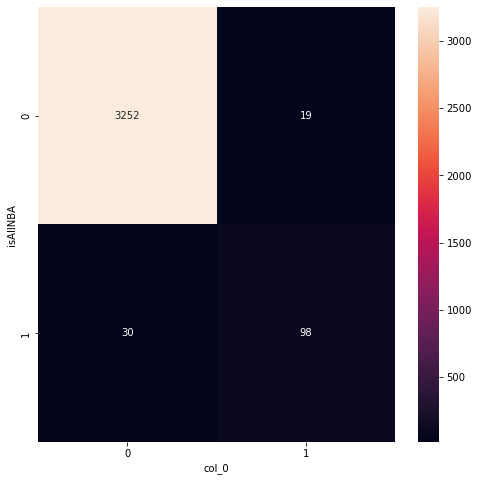

In [24]:
# Membulatkan prediksi data Development dengan threshold yang optimal
logreg_dev_result = np.where(logreg.predict(X_dev_logreg_sel) > logreg_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], logreg_dev_result)

In [25]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
logreg_dev_metrics = eval_metrics(y_dev[target[0]], logreg_dev_result)

# Menunjukan hasil metrik dari model
logreg_dev_metrics

{'tp': 98,
 'tn': 3252,
 'fn': 30,
 'fp': 19,
 'accuracy': 0.9855839952927331,
 'recall': 0.765625,
 'precision': 0.8376068376068376,
 'f1': 0.8}

### 3.3. Pemodelan dengan *Random Forest*

#### 3.3.1. Mencari Hyperparameter terbaik untuk *Random Forest*

In [26]:
# Mendefinisikan dictionary untuk hyperparameter yang akan dicari
hyperparameter = {
    'n_estimators': np.linspace(1, 50, 50, dtype = int).tolist(),
    'criterion': ('gini', 'entropy')
}

# Menggunakan random searching untuk mencari hyperparameter terbaik
rf = RandomizedSearchCV(RandomForestClassifier(random_state = 0), 
                        hyperparameter, 
                        n_iter = 30, 
                        scoring = 'f1', 
                        cv = 5, 
                        random_state = 0,
                        n_jobs = 10)

# Melakukan fitting terhadap data training
rf.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=30, n_jobs=10,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=0, scoring='f1')

In [27]:
# Menampilkan skor terbaik dan parameter terbaik
print(f'Skor F1 terbaik adalah {rf.best_score_} '
      f'dengan hyperparameter terbaik {rf.best_params_["n_estimators"]} estimator dengan kriteria {rf.best_params_["criterion"]}.')

Skor F1 terbaik adalah 0.9899652222768566 dengan hyperparameter terbaik 14 estimator dengan kriteria gini.


#### 3.3.2. Evaluasi Data *Training*

In [28]:
# Mencari threshold probabilitas terbaik untuk model Random Forest
rf_threshold = optimal_threshold(y_dev[target[0]], rf.predict_proba(X_dev)[:, 1], n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.71 dengan skor f1 72.58687258687257%


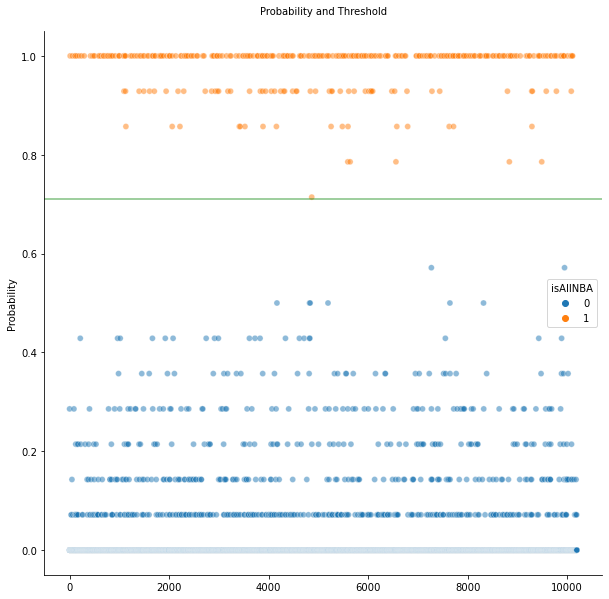

In [29]:
# Plotting hasil proabilitas data training
prob_threshold_plot(rf.predict_proba(X_train)[:, 1], hue_tar = y_train['isAllNBA'], threshold = rf_threshold)

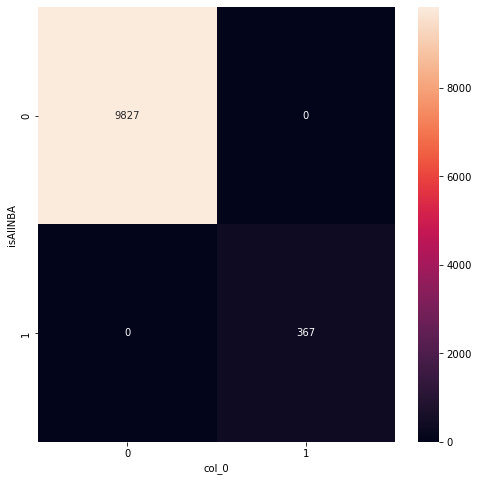

In [30]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
rf_train_result = np.where(rf.predict_proba(X_train)[:, 1] > rf_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], rf_train_result)

In [31]:
# Mengkalkulasi metrik dari probabilitas training
rf_train_metrics = eval_metrics(y_train[target[0]], rf_train_result)

# Menunjukan metrik-metrik evaluasi
rf_train_metrics

{'tp': 367,
 'tn': 9827,
 'fn': 0,
 'fp': 0,
 'accuracy': 1.0,
 'recall': 1.0,
 'precision': 1.0,
 'f1': 1.0}

#### 3.3.3. Evaluasi Data *Development*

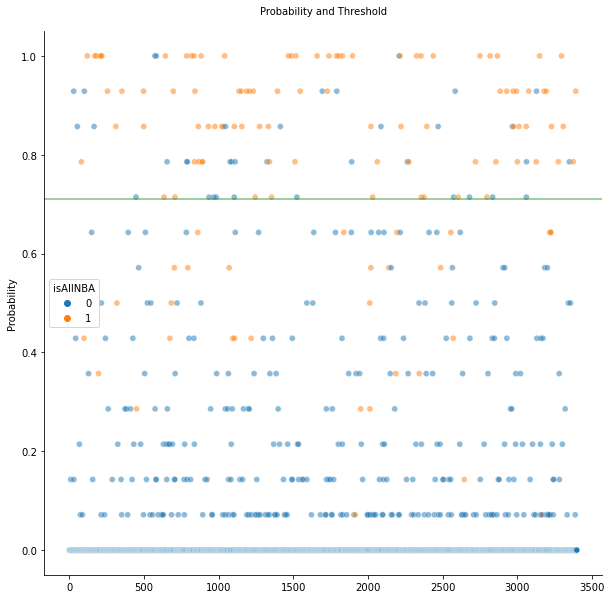

In [32]:
# Plotting hasil proabilitas data development
prob_threshold_plot(rf.predict_proba(X_dev)[:, 1], hue_tar = y_dev['isAllNBA'], threshold = rf_threshold)

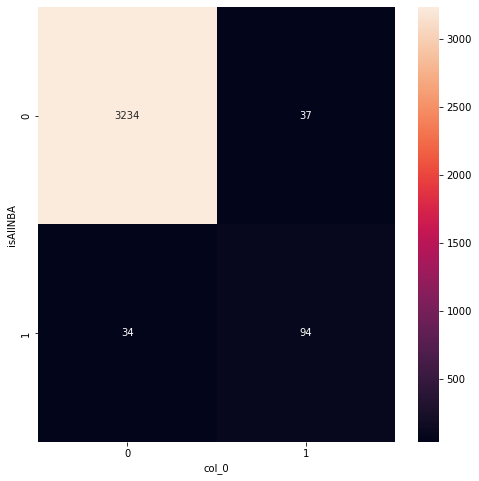

In [33]:
# Membulatkan prediksi data Development dengan threshold yang optimal
rf_dev_result = np.where(rf.predict_proba(X_dev)[:, 1] > rf_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], rf_dev_result)

In [34]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
rf_dev_metrics = eval_metrics(y_dev[target[0]], rf_dev_result)

# Menunjukan hasil metrik dari model
rf_dev_metrics

{'tp': 94,
 'tn': 3234,
 'fn': 34,
 'fp': 37,
 'accuracy': 0.9791115033833481,
 'recall': 0.734375,
 'precision': 0.7175572519083969,
 'f1': 0.7258687258687258}

### 3.4. Pemodelan dengan *Neural Network*

#### 3.4.1. Melakukan Pemodelan *Neural Network*

In [35]:
# Memasukan model yang diinginkan kembali ke notebook
nn = tf.keras.models.load_model('Classifier.hdf5')

# Memunculkan summary dari model yang dimasukan
nn.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_10 (Dense)            (None, 256)               6400      
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                           

In [36]:
# Menampilkan grafik progresi pelatihan
Image('History.png')

#### 3.4.4. Evaluasi Data *Training*

In [37]:
# Mencari threshold probabilitas terbaik untuk model Neural Network
nn_threshold = optimal_threshold(y_dev[target[0]], nn.predict(X_dev).reshape((-1,)), n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.91 dengan skor f1 82.57575757575756%


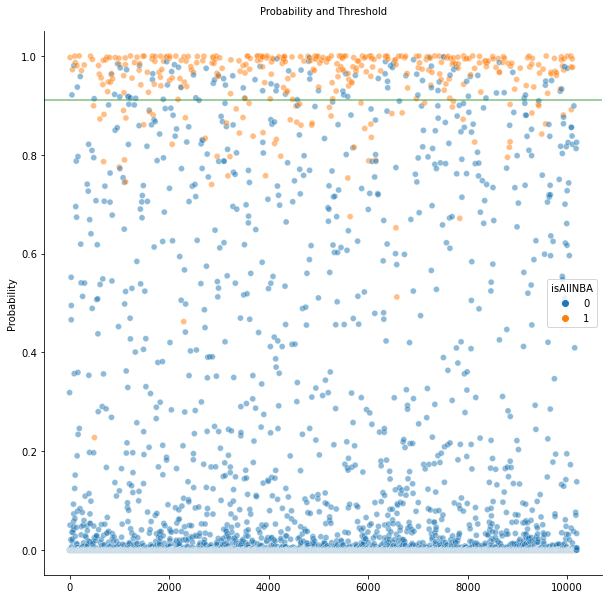

In [38]:
# Plotting hasil proabilitas data training
prob_threshold_plot(nn.predict(X_train).reshape((-1,)), hue_tar = y_train[target[0]], threshold = nn_threshold)

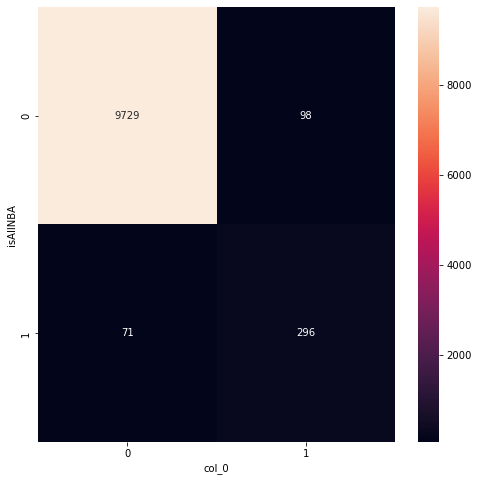

In [39]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
nn_train_result = np.where(nn.predict(X_train).reshape((-1,)) > nn_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], nn_train_result)

In [40]:
# Mengkalkulasi metrik dari probabilitas training
nn_train_metrics = eval_metrics(y_train[target[0]], nn_train_result)

# Menunjukan metrik-metrik evaluasi
nn_train_metrics

{'tp': 296,
 'tn': 9729,
 'fn': 71,
 'fp': 98,
 'accuracy': 0.9834216205611144,
 'recall': 0.8065395095367848,
 'precision': 0.751269035532995,
 'f1': 0.7779237844940868}

#### 3.4.5. Evaluasi Data *Development*

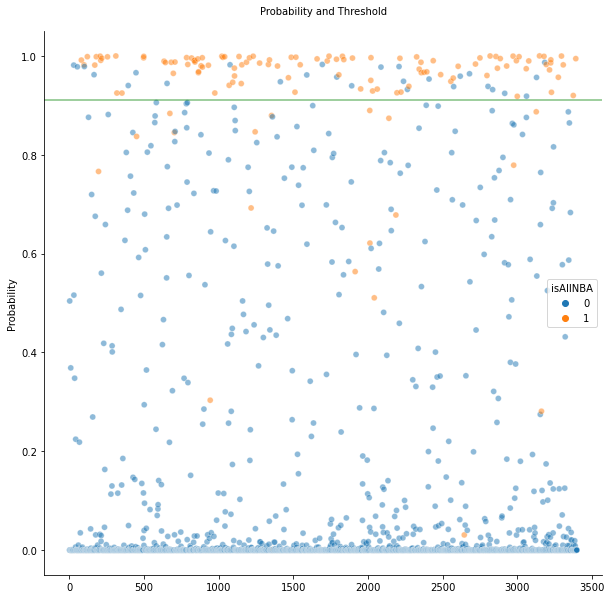

In [41]:
# Plotting hasil proabilitas data development
prob_threshold_plot(nn.predict(X_dev).reshape((-1,)), hue_tar = y_dev[target[0]], threshold = nn_threshold)

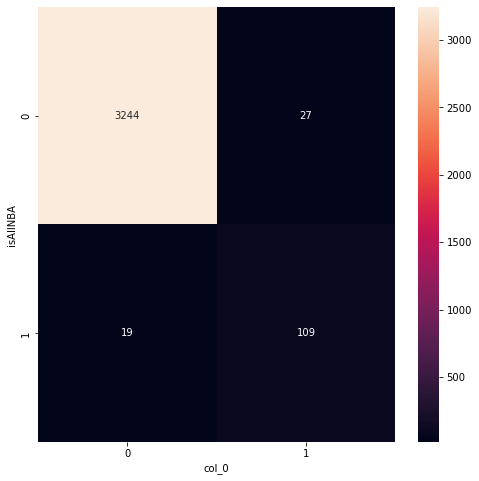

In [42]:
# Membulatkan prediksi data Development dengan threshold yang optimal
nn_dev_result = np.where(nn.predict(X_dev).reshape((-1,)) > nn_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], nn_dev_result)

In [43]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
nn_dev_metrics = eval_metrics(y_dev[target[0]], nn_dev_result)

# Menunjukan hasil metrik dari model
nn_dev_metrics

{'tp': 109,
 'tn': 3244,
 'fn': 19,
 'fp': 27,
 'accuracy': 0.9864666078258312,
 'recall': 0.8515625,
 'precision': 0.8014705882352942,
 'f1': 0.8257575757575757}

## 4. Perbandingan Model

In [44]:
# Membuat dataframe dari semua metrik yang sudah dihitung
compare = create_compare_frame([logreg_train_metrics, rf_train_metrics, nn_train_metrics], [logreg_dev_metrics, rf_dev_metrics, nn_dev_metrics])

# Memunculkan dataframe yang dibuat
compare

,model,tp,tn,fn,fp,accuracy,recall,precision,f1,dataset
0,logistic regression,248,9764,119,63,0.982146,0.675749,0.797428,0.731563,train
1,random forest,367,9827,0,0,1.000000,1.000000,1.000000,1.000000,train
2,neural network,296,9729,71,98,0.983422,0.806540,0.751269,0.777924,train
3,logistic regression,98,3252,30,19,0.985584,0.765625,0.837607,0.800000,dev
4,random forest,94,3234,34,37,0.979112,0.734375,0.717557,0.725869,dev
5,neural network,109,3244,19,27,0.986467,0.851562,0.801471,0.825758,dev


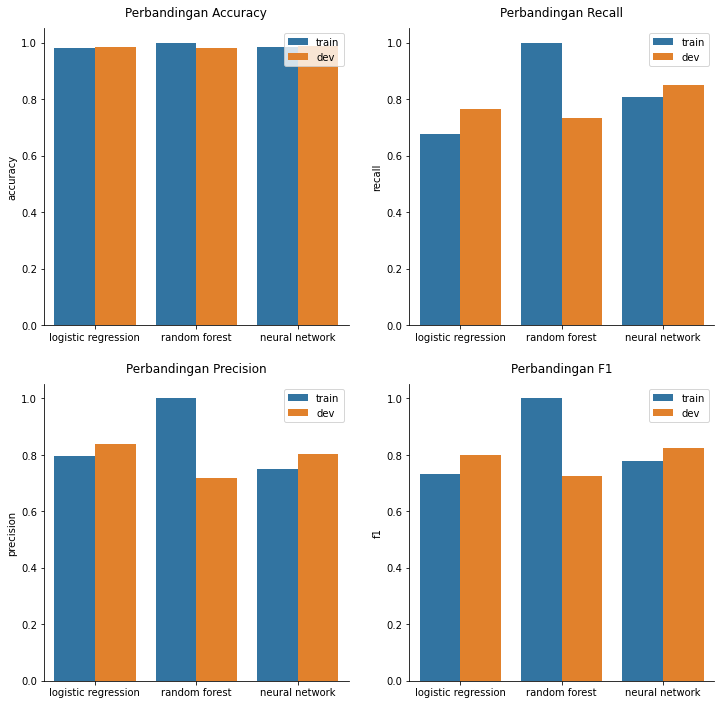

In [45]:
# Membuat 4 subplot
plt.subplots(2, 2, figsize = (12, 12))

# Melakukan looping untuk metrik yang diinginkan
for n, metric in enumerate(['accuracy', 'recall', 'precision', 'f1']):
    # Mengatur agar grafik sesuai dengan subplot yang kosong
    plt.subplot(2, 2, n+1)
    # Membuat grafik bar untuk metrik yang diinginkan
    sns.barplot(x = 'model', y = metric, hue = 'dataset', data = compare)
    # Pengaturan grafik
    plt.title(f'Perbandingan {str.title(metric)}', y = 1.02)
    plt.ylabel(metric)
    plt.xlabel('')
    plt.legend()
    sns.despine()

## 5. Uji Hipotesa

In [46]:
# Melakukan uji hipotesa dengan model terbaik
binom_test(nn_dev_metrics['accuracy'] * len(y_dev), n = len(y_dev), p = 0.5)

0.0

## 6. Menggunakan Model-Model untuk Memprediksi Pemenang Tahun 2021-2022

In [47]:
# Mengimpor data testing
raw_test = pd.read_csv('test.csv')

# Memunculkan 5 data pertama dari data mentah
raw_test.sample(10, random_state = 0)

,player,pos,age,tm,g,tmp,per,ts%,3par,ftr,...,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,year
573,Paul Watson,SF,27,OKC,9,156,5.7,0.432,0.743,0.057,...,11.0,-0.1,0.1,0.0,0.001,-4.8,-0.6,-5.4,-0.1,2022
52,Keljin Blevins,SF,26,POR,31,349,4.8,0.410,0.649,0.099,...,16.5,-0.6,0.1,-0.5,-0.066,-5.6,-2.9,-8.5,-0.6,2022
528,Emanuel Terry,PF,25,PHO,3,18,-0.1,0.000,0.000,0.000,...,23.9,-0.1,0.0,-0.1,-0.256,-13.0,-5.3,-18.3,-0.1,2022
343,Théo Maledon,PG,20,OKC,51,908,10.6,0.500,0.473,0.315,...,20.3,-0.5,0.8,0.3,0.015,-3.7,-0.7,-4.4,-0.6,2022
55,Bol Bol,PF,22,DEN,14,81,13.5,0.565,0.148,0.185,...,18.0,0.0,0.1,0.1,0.065,-0.5,-0.4,-1.0,0.0,2022
62,Avery Bradley,SG,31,LAL,62,1406,7.8,0.550,0.600,0.051,...,12.1,0.3,0.9,1.2,0.040,-3.5,-0.1,-3.6,-0.6,2022
346,Tre Mann,PG,20,OKC,60,1367,10.2,0.501,0.463,0.139,...,22.0,-1.0,1.0,0.1,0.002,-3.3,-1.1,-4.3,-0.8,2022
304,Braxton Key,SF,24,TOT,11,197,13.7,0.508,0.292,0.181,...,19.4,-0.1,0.3,0.2,0.052,-3.8,0.6,-3.3,-0.1,2022
206,Javonte Green,SF,28,CHI,65,1519,14.0,0.637,0.311,0.295,...,11.5,2.9,1.5,4.4,0.139,-0.6,0.7,0.1,0.8,2022
405,Aaron Nesmith,SF,22,BOS,52,574,7.3,0.507,0.632,0.143,...,17.2,-0.4,0.9,0.4,0.038,-4.9,0.7,-4.3,-0.3,2022


In [48]:
# Memproses data testing
test = process_data(raw_test, dummies = False)

# Melakukan scaling ke kolom-kolom yang diinginkan di data testing
test_to_pred = scaler(process_data(raw_test, dummies = True), exclude = ['pos_G', 'pos_F'])

In [49]:
# Memprediksi data testing menggunakan Regresi Logistik
test['logreg_prob'] = logreg.predict(sm.add_constant(test_to_pred[selected_col]))

# Memprediksi data testing menggunakan Random Forest
test['rf_prob'] = rf.predict_proba(test_to_pred[feature])[:, 1]

# Memprediksi data testing menggunakan Neural Network
test['nn_prob'] = nn.predict(test_to_pred[feature])

In [50]:
# Memilih 15 pemain All-NBA sesuai dengan aturan pilih
select_all_nba(test, 'nn_prob')

,player,pos,nn_prob
0,Luka Dončić,G,0.998228
1,Trae Young,G,0.997495
2,Ja Morant,G,0.988875
3,Stephen Curry,G,0.984677
4,Donovan Mitchell,G,0.979788
5,Devin Booker,G,0.977542
6,Giannis Antetokounmpo,F,0.999378
7,Jayson Tatum,F,0.991008
8,Kevin Durant,F,0.982346
9,LeBron James,F,0.978922
